In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

ModuleNotFoundError: No module named 'tensorflow'

In [7]:
df=pd.read_excel(r'/content/drive/MyDrive/Tweet_NFT.xlsx')
df

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762.0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community
1,1212763.0,Need Sick Character artâ_x009d_“#art #artist #...,2022-08-06T16:56:36.000Z,Giveaway
2,1212765.0,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation
3,1212766.0,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community
4,1212767.0,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community
...,...,...,...,...
127448,1278721.0,"@Jason My company Universe is solving this, an...",2022-08-08T03:32:01.000Z,NaN
127449,1278723.0,@BosoTokyo Many will get rekt in this NFT,2022-08-08T03:32:00.000Z,NaN
127450,1278724.0,@leeneedham81 @KibaInuWorld @HODL_OFFICIAL @Ko...,2022-08-08T03:32:00.000Z,NaN
127451,1278725.0,@1kz3ro @UNLEASHED_NFT I love this job,2022-08-08T03:31:59.000Z,NaN


In [8]:
df = df.drop(['id','tweet_created_at'], axis =1)

In [9]:
df.columns = ['text',  'category']

In [10]:
df.describe()

,text,category
count,127453,96364
unique,114494,9
top,@Codex314159265 Feature it on @Globalnft07\nWe...,Community
freq,381,41510


In [11]:
df.dtypes

text        object
category    object
dtype: object

In [12]:
df['category'].nunique()

9

In [13]:
df['category'] = df['category'].apply(str)

In [14]:
df['category'].value_counts()


Community         41510
nan               31089
Giveaway          21041
Appreciation      16451
Whitelist          8320
Presale            5107
Done               3049
pinksale            477
Interested          276
Launching Soon      133
Name: category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


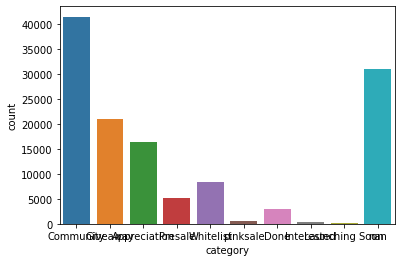

In [15]:
sns.countplot(df['category'])

In [16]:
df['text'][10]

'@greatmando_nft Depends'

In [17]:
df.isnull().sum()

text        0
category    0
dtype: int64

#Text CLeaning

In [18]:
space = re.compile('[/(){}\[\]\|@,;]')
symbols= re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = space.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = symbols.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

In [19]:
df['text']=df['text'].apply(clean_text)

In [20]:
df['text'][10]

'greatmando_nft depends'

In [21]:
df['text'][50]

'sisto_hkkt feature globalnft07we great community nft artists nft collectors'

In [22]:
g=[]

In [23]:
for i in df['text']:
    g.append(i)

In [24]:
len(g)

127453

In [25]:
len(g[4])

212

In [ ]:
"""for i in g:
    print(len(i))"""

In [ ]:
#G

In [29]:
maxl = max([len(s) for s in g])
print ('Maximum sequence length in the list of sentences:', maxl)

Maximum sequence length in the list of sentences: 820


# So this will be the maximum length of padding..

In [30]:
tokenizer = Tokenizer(num_words=50000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 213368 unique tokens.


In [31]:
maxl

820

## As the length maximum length of the sequence is much, we will be selecting maximum length as 3000.

In [32]:
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X, maxlen=3000)

In [33]:
X.shape

(127453, 3000)

In [34]:
Y = pd.get_dummies(df['category'],columns=df["category"]).values
Y

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [35]:
len(Y)

127453

In [36]:
Y[0]


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [37]:
Y[1]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [38]:
Y[2223]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [39]:
df.head(3)

,text,category
0,crypto_brody ecology1990 moonrunnersnft itsuki...,Community
1,need sick character art_009d_#art #artist #art...,Giveaway
2,the_hulk_nft inagotchinft tesla killabearsnft ...,Appreciation


In [40]:
df.tail(3)

,text,category
127450,leeneedham81 kibainuworld hodl_official koacom...,nan
127451,1kz3ro unleashed_nft love job,nan
127452,shill_ronin unleashed_nft proof https tco 44di...,nan


# 1st Label->business
# 2nd Label->entertainment
# 3rd Label->politics
# 4th Label->sport
# 5th Label->tech

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(114707, 3000) (114707, 10)
(12746, 3000) (12746, 10)


# MODEL-->

In [42]:
model=Sequential()
model.add(Embedding(50000,100,input_length=3000))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3000, 100)         5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 3000, 100)        0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
Total params: 5,081,410
Trainable params: 5,081,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs=7, batch_size=64,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/7
  97/1614 [>.............................] - ETA: 3:57:46 - loss: 1.4659 - accuracy: 0.4716

In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();